## Exploring the ToxPost data


In [1]:
import os
os.chdir("..")
print(f'the current working directory is {os.getcwd()}')

the current working directory is /Users/Louis/ml_projects/ToxPost


In [2]:
import random
import pandas as pd
from src.load import load_dataframe
from src.visualize import desc_stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the raw training data:

raw_data_path = "./data/raw/data.csv"
data = load_dataframe(raw_data_path, header=True, id_tag=True)
labels = data.drop('comment_text', axis='columns')

In [4]:
data.sample(n=10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
67629,"No, Mcconn, we can't agree to eliminate all th...",0,0,0,0,0,0
25173,Your Age \n\nYou might want to rethink adverti...,1,0,0,0,0,0
20386,This particular issue of Homeopathy is written...,0,0,0,0,0,0
35846,O.K. User:Nmate I forgot myself at Zilina.,0,0,0,0,0,0
108320,I like it! And happy holidays to you and yours.,0,0,0,0,0,0
28904,"thank you very much, i hope this is just an un...",0,0,0,0,0,0
71824,"""\n\n Pronoun apology \nHiya, while gather the...",0,0,0,0,0,0
54403,Nothing is ever going to change that picture f...,0,0,0,0,0,0
32383,"""\n\n Mini-episodes \n\nCurrently, revived ser...",0,0,0,0,0,0
51390,"""\n\n June 2007 \n Please stop. If you continu...",0,0,0,0,0,0


In [5]:
comment_lengths = data.loc[:,'comment_text'].apply(str.split).apply(len)

We'll give some information on the frequentist stats of the comment lengths. To this end, we use the desc_stats function built for this purpose:

In [6]:
length_stats = desc_stats(comment_lengths)

In [7]:
print(length_stats)

count                    159571
mean                    67.2735
std                     99.2307
min                           1
25%                          17
50%                          36
75%                          75
max                        1411
IQR                          58
outlier_range    [-70.0, 162.0]
nr_outliers         [0, 145025]
Name: comment_text, dtype: object


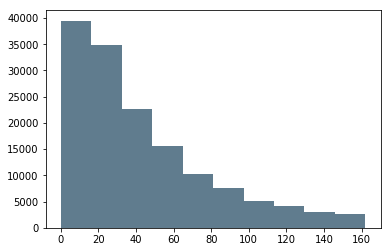

In [9]:
plt.hist(comment_lengths, range=[0,length_stats["outlier_range"][1]], color="#607c8e")
plt.show()


the percentage of nonzero comments is:

toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

the labels are distributed as follows:


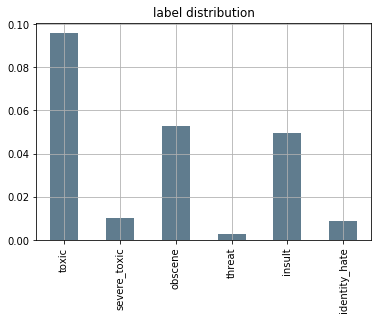

In [19]:
nonzero_comments = labels.apply(sum, axis= "index").div(len(labels))
print(f"\nthe percentage of nonzero comments is:\n\n{nonzero_comments}\n")
print("the labels are distributed as follows:")
(labels.sum(axis=0)/len(labels)).plot.bar(color='#607c8e')
plt.title('label distribution')
plt.grid()

We'll need to bootstrap later on...